# Мокин Арсений 521 группа
# Спецкурс «Математические основы цифровой обработки изображений»
# Морфологические операторы

In [225]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

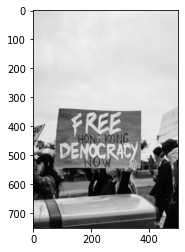

In [291]:
img = cv2.imread('img.jpg')
plt.imshow(img)

##Эрозия

In [292]:
def erosian(img: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    y = kernal.shape[0] // 2
    x = kernal.shape[1] // 2
    processed_image = np.copy(img)
    for i in range(y, img.shape[0] - y):
        for j in range(x, img.shape[1] - x):
            local_window = img[i-y:i+y+1, j-x:j+x+1]
            processed_image[i][j] = np.min(local_window[kernal])
    return processed_image 

## Дилатация

In [293]:
def dilate(img: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    y = kernal.shape[0] // 2
    x = kernal.shape[1] // 2
    processed_image = np.copy(img)
    for i in range(y, img.shape[0] - y):
        for j in range(x, img.shape[1] - x):
            local_window = img[i-y:i+y+1, j-x:j+x+1]
            processed_image[i][j] = np.max(local_window[kernal])
    return processed_image 

## Открытие

In [294]:
def opening(img: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    temp = erosian(img, kernal)
    output = dilate(temp, kernal)
    return output

## Закрытие

In [295]:
def closing(img: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    temp = dilate(img, kernal)
    output = erosian(temp, kernal)
    return output

Структурирующие элементы (ядра):
*   Крест размерности 3
*   Квадрат размерности 3
*   Крест размерности 5
*   Квадрат размерности 5

In [296]:
structs = {
    'cross3': np.array([[False,True,False],[True,True,True],[False,True,False]], dtype=bool),
    'rect3': np.ones((3,3), dtype=bool),
    'cross5': np.array([
        [False,False,True,False,False],
        [False,False,True,False,False],
        [True,True,True,True,True],
        [False,False,True,False,False],
        [False,False,True,False,False]], dtype=bool),
    'rect5': np.ones((5,5), dtype=bool)
}

# Сравнение с OpenCV

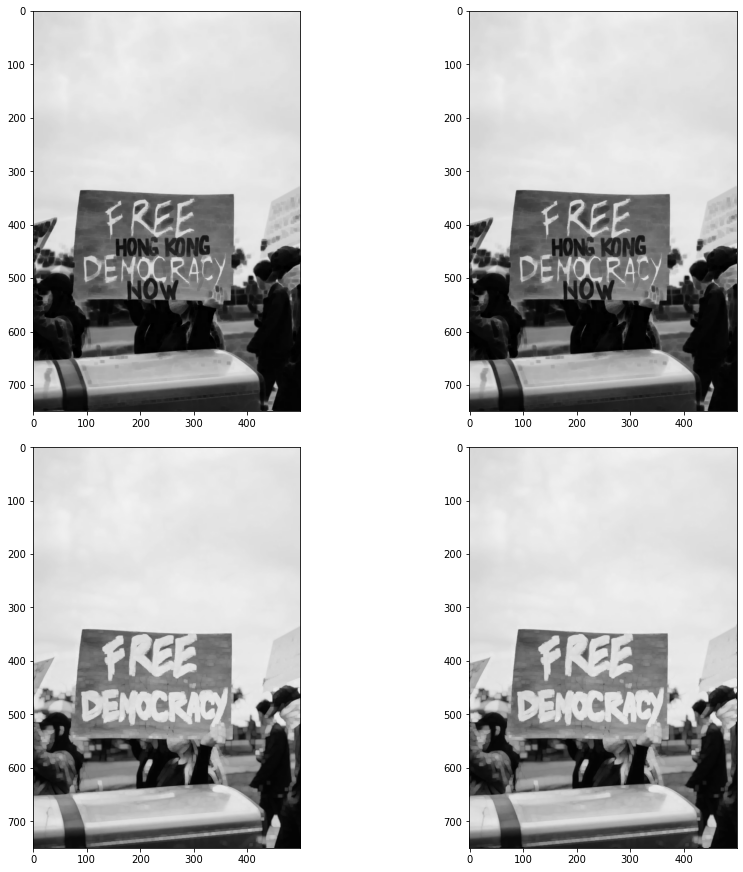

In [297]:
compare = plt.figure(figsize=(12,12), constrained_layout=True).subplots(2, 2)
compare = compare.flatten()
operators = [
    erosian(img, structs['rect5']),
    cv2.erode(img, structs['rect5'].astype(np.uint8)),
    cv2.dilate(img, structs['rect5'].astype(np.uint8)),
    dilate(img, structs['rect5'])
]
for a, b in zip(compare, operators):
  a.imshow(b)

## Градиент

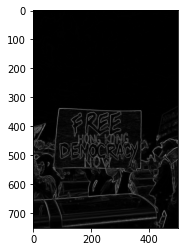

In [298]:
plt.imshow(dilate(img, structs['cross3']) - erosian(img, structs['cross3']))

# Случайный шум

In [299]:
def random_noise(img: np.ndarray, part: float)->np.ndarray:
    random_index = (np.random.rand(img.shape[0], img.shape[1])*100).astype(np.uint8) 
    output = np.copy(img) 
    output[random_index<=part] = 255
    random_index = (np.random.rand(img.shape[0], img.shape[1])*100).astype(np.uint8) 
    output[random_index<=part] = 0
    return output

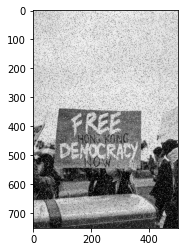

In [304]:
rand_img = random_noise(img, 5)
plt.imshow(rand_img)

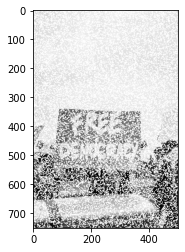

In [305]:
plt.imshow(dilate(rand_img, structs['rect3']))

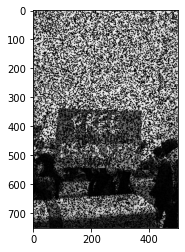

In [306]:
plt.imshow(erosian(rand_img, structs['rect3']))

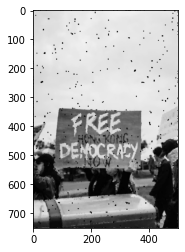

In [307]:
plt.imshow(closing(opening(rand_img, structs['rect3']), structs['rect3']))

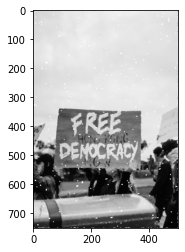

In [308]:
plt.imshow(opening(closing(rand_img, structs['rect3']), structs['rect3']))